In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [ ]:
df=pd.read_csv("/content/fin_dataset(in).csv")

In [ ]:
df.shape

(219, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subject_ID                219 non-null    int64  
 1   mean_segment1             219 non-null    float64
 2   std_dev_segment1          219 non-null    float64
 3   min_segment1              219 non-null    float64
 4   max_segment1              219 non-null    float64
 5   range_segment1            219 non-null    float64
 6   mean_segment2             219 non-null    float64
 7   std_dev_segment2          219 non-null    float64
 8   min_segment2              219 non-null    float64
 9   max_segment2              219 non-null    float64
 10  range_segment2            219 non-null    float64
 11  mean_segment3             219 non-null    float64
 12  std_dev_segment3          219 non-null    float64
 13  min_segment3              219 non-null    float64
 14  max_segmen

In [ ]:
df.head()

,subject_ID,mean_segment1,std_dev_segment1,min_segment1,max_segment1,range_segment1,mean_segment2,std_dev_segment2,min_segment2,max_segment2,...,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,BMI,Hypertension,Unnamed: 27,Diabetes,cerebral infarction,cerebrovascular disease
0,2,9485.403875,59830.644220,-56862.998890,249752.946200,306615.945100,-6198.949210,61384.237320,-102828.694500,292507.165200,...,63,161,89,97,27.27,Stage 2 hypertension,NaN,NaN,NaN,NaN
1,3,-1061.086816,3806.224675,-14369.621750,2407.896262,16777.518010,795.811176,2441.890040,-8250.101800,5737.767204,...,50,160,93,76,20.28,Stage 2 hypertension,NaN,NaN,NaN,NaN
2,6,-297.045623,931.764930,-2213.324923,3231.658501,5444.983424,-3870.598013,29386.165410,-136997.853400,26718.173240,...,47,101,71,79,20.89,Normal,NaN,NaN,NaN,NaN
3,8,-480.953082,978.021375,-2736.596369,449.539475,3186.135845,-1161.442310,10504.289360,-18964.933090,41770.684700,...,65,136,93,87,21.97,Prehypertension,NaN,NaN,NaN,NaN
4,9,-699.162080,13255.910340,-57313.694410,15812.229080,73125.923480,-477.973301,2345.917488,-4635.316139,8616.540608,...,65,123,73,73,27.06,Prehypertension,NaN,NaN,NaN,NaN


In [ ]:
df.drop('Unnamed: 27', inplace=True, axis=1)

In [ ]:
df.drop('Num.', inplace=True, axis=1)

In [ ]:
df.head()

,subject_ID,mean_segment1,std_dev_segment1,min_segment1,max_segment1,range_segment1,mean_segment2,std_dev_segment2,min_segment2,max_segment2,...,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,BMI,Hypertension,Diabetes,cerebral infarction,cerebrovascular disease
0,2,9485.403875,59830.644220,-56862.998890,249752.946200,306615.945100,-6198.949210,61384.237320,-102828.694500,292507.165200,...,152,63,161,89,97,27.27,Stage 2 hypertension,NaN,NaN,NaN
1,3,-1061.086816,3806.224675,-14369.621750,2407.896262,16777.518010,795.811176,2441.890040,-8250.101800,5737.767204,...,157,50,160,93,76,20.28,Stage 2 hypertension,NaN,NaN,NaN
2,6,-297.045623,931.764930,-2213.324923,3231.658501,5444.983424,-3870.598013,29386.165410,-136997.853400,26718.173240,...,150,47,101,71,79,20.89,Normal,NaN,NaN,NaN
3,8,-480.953082,978.021375,-2736.596369,449.539475,3186.135845,-1161.442310,10504.289360,-18964.933090,41770.684700,...,172,65,136,93,87,21.97,Prehypertension,NaN,NaN,NaN
4,9,-699.162080,13255.910340,-57313.694410,15812.229080,73125.923480,-477.973301,2345.917488,-4635.316139,8616.540608,...,155,65,123,73,73,27.06,Prehypertension,NaN,NaN,NaN


In [ ]:
df.duplicated().sum()

0

In [ ]:
#df['Diabetes'] = df['Diabetes'].apply(lambda x: 1 if x == 'Diabetes' else 0)
df['Diabetes'] = df['Diabetes'].replace({'Diabetes': 1, 'Type 2 Diabetes': 1})
df['Diabetes'] = df['Diabetes'].fillna(0)

df['cerebral infarction'] = df['cerebral infarction'].apply(lambda x: 1 if x == 'cerebral infarction' else 0)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'Female' else 0)

<ipython-input-11-0916f5435bb3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diabetes'] = df['Diabetes'].replace({'Diabetes': 1, 'Type 2 Diabetes': 1})


In [ ]:
df.drop('subject_ID', inplace=True, axis=1)

In [ ]:
df.tail()

,mean_segment1,std_dev_segment1,min_segment1,max_segment1,range_segment1,mean_segment2,std_dev_segment2,min_segment2,max_segment2,range_segment2,...,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,BMI,Hypertension,Diabetes,cerebral infarction,cerebrovascular disease
214,6529.595816,83556.23927,-368755.82010,136555.40430,505311.2244,-2491.881962,14583.42849,-65230.46436,13605.50038,78835.96475,...,180,70,111,70,77,21.60,Normal,0.0,0,NaN
215,9679.100370,87969.87701,-97671.27428,384048.11910,481719.3934,-8534.838785,50452.20321,-98839.13109,218455.88750,317295.01860,...,156,47,93,57,79,19.31,Normal,0.0,0,NaN
216,-606.310889,52042.72265,-74727.28275,223177.98390,297905.2666,8917.567294,38159.85493,-28867.08189,155303.67610,184170.75790,...,176,55,120,69,72,17.76,Prehypertension,0.0,0,NaN
217,3974.849534,12084.97654,-41972.43796,28029.74193,70002.1799,1623.728825,34200.01850,-159872.14020,50846.48203,210718.62230,...,173,63,106,69,67,21.05,Normal,0.0,0,NaN
218,6911.782303,49549.36259,-46868.97246,220309.27320,267178.2456,2589.177157,16597.62057,-72272.99309,28717.72401,100990.71710,...,175,58,108,68,65,18.94,Normal,0.0,0,NaN


In [ ]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['Hypertension','cerebrovascular disease'])],remainder='passthrough')
conf=ct.fit_transform(df)

In [ ]:
conf1=pd.DataFrame(conf)

In [ ]:
conf1.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9485.403875,59830.644220,-56862.998890,...,1.0,45.0,152.0,63.0,161.0,89.0,97.0,27.27,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1061.086816,3806.224675,-14369.621750,...,1.0,50.0,157.0,50.0,160.0,93.0,76.0,20.28,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-297.045623,931.764930,-2213.324923,...,1.0,47.0,150.0,47.0,101.0,71.0,79.0,20.89,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-480.953082,978.021375,-2736.596369,...,0.0,45.0,172.0,65.0,136.0,93.0,87.0,21.97,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-699.162080,13255.910340,-57313.694410,...,1.0,46.0,155.0,65.0,123.0,73.0,73.0,27.06,0.0,0.0


In [ ]:
df.head()

,mean_segment1,std_dev_segment1,min_segment1,max_segment1,range_segment1,mean_segment2,std_dev_segment2,min_segment2,max_segment2,range_segment2,...,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,BMI,Hypertension,Diabetes,cerebral infarction,cerebrovascular disease
0,9485.403875,59830.644220,-56862.998890,249752.946200,306615.945100,-6198.949210,61384.237320,-102828.694500,292507.165200,395335.85970,...,152,63,161,89,97,27.27,Stage 2 hypertension,0.0,0,NaN
1,-1061.086816,3806.224675,-14369.621750,2407.896262,16777.518010,795.811176,2441.890040,-8250.101800,5737.767204,13987.86900,...,157,50,160,93,76,20.28,Stage 2 hypertension,0.0,0,NaN
2,-297.045623,931.764930,-2213.324923,3231.658501,5444.983424,-3870.598013,29386.165410,-136997.853400,26718.173240,163716.02660,...,150,47,101,71,79,20.89,Normal,0.0,0,NaN
3,-480.953082,978.021375,-2736.596369,449.539475,3186.135845,-1161.442310,10504.289360,-18964.933090,41770.684700,60735.61779,...,172,65,136,93,87,21.97,Prehypertension,0.0,0,NaN
4,-699.162080,13255.910340,-57313.694410,15812.229080,73125.923480,-477.973301,2345.917488,-4635.316139,8616.540608,13251.85675,...,155,65,123,73,73,27.06,Prehypertension,0.0,0,NaN


In [ ]:
conf_cat = conf1[[0, 1, 2, 3, 4, 5, 6, 27, 28]]
conf_cat.head()

,0,1,2,3,4,5,6,27,28
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,161.0,89.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,160.0,93.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,101.0,71.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,136.0,93.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,123.0,73.0


<Axes: >

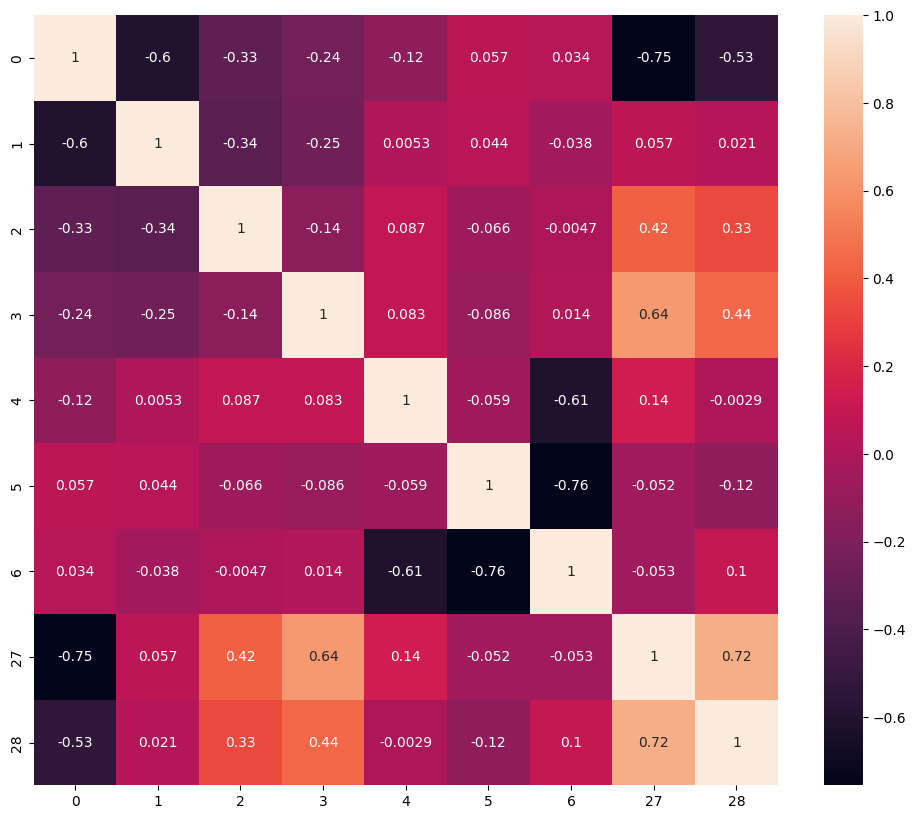

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
sns.heatmap(conf_cat.corr(),annot=True)

In [ ]:
conf_num = conf1.drop(conf1.columns[:7], axis=1)
conf_num.head()

,7,8,9,10,11,12,13,14,15,16,...,23,24,25,26,27,28,29,30,31,32
0,9485.403875,59830.644220,-56862.998890,249752.946200,306615.945100,-6198.949210,61384.237320,-102828.694500,292507.165200,395335.85970,...,1.0,45.0,152.0,63.0,161.0,89.0,97.0,27.27,0.0,0.0
1,-1061.086816,3806.224675,-14369.621750,2407.896262,16777.518010,795.811176,2441.890040,-8250.101800,5737.767204,13987.86900,...,1.0,50.0,157.0,50.0,160.0,93.0,76.0,20.28,0.0,0.0
2,-297.045623,931.764930,-2213.324923,3231.658501,5444.983424,-3870.598013,29386.165410,-136997.853400,26718.173240,163716.02660,...,1.0,47.0,150.0,47.0,101.0,71.0,79.0,20.89,0.0,0.0
3,-480.953082,978.021375,-2736.596369,449.539475,3186.135845,-1161.442310,10504.289360,-18964.933090,41770.684700,60735.61779,...,0.0,45.0,172.0,65.0,136.0,93.0,87.0,21.97,0.0,0.0
4,-699.162080,13255.910340,-57313.694410,15812.229080,73125.923480,-477.973301,2345.917488,-4635.316139,8616.540608,13251.85675,...,1.0,46.0,155.0,65.0,123.0,73.0,73.0,27.06,0.0,0.0


<Axes: >

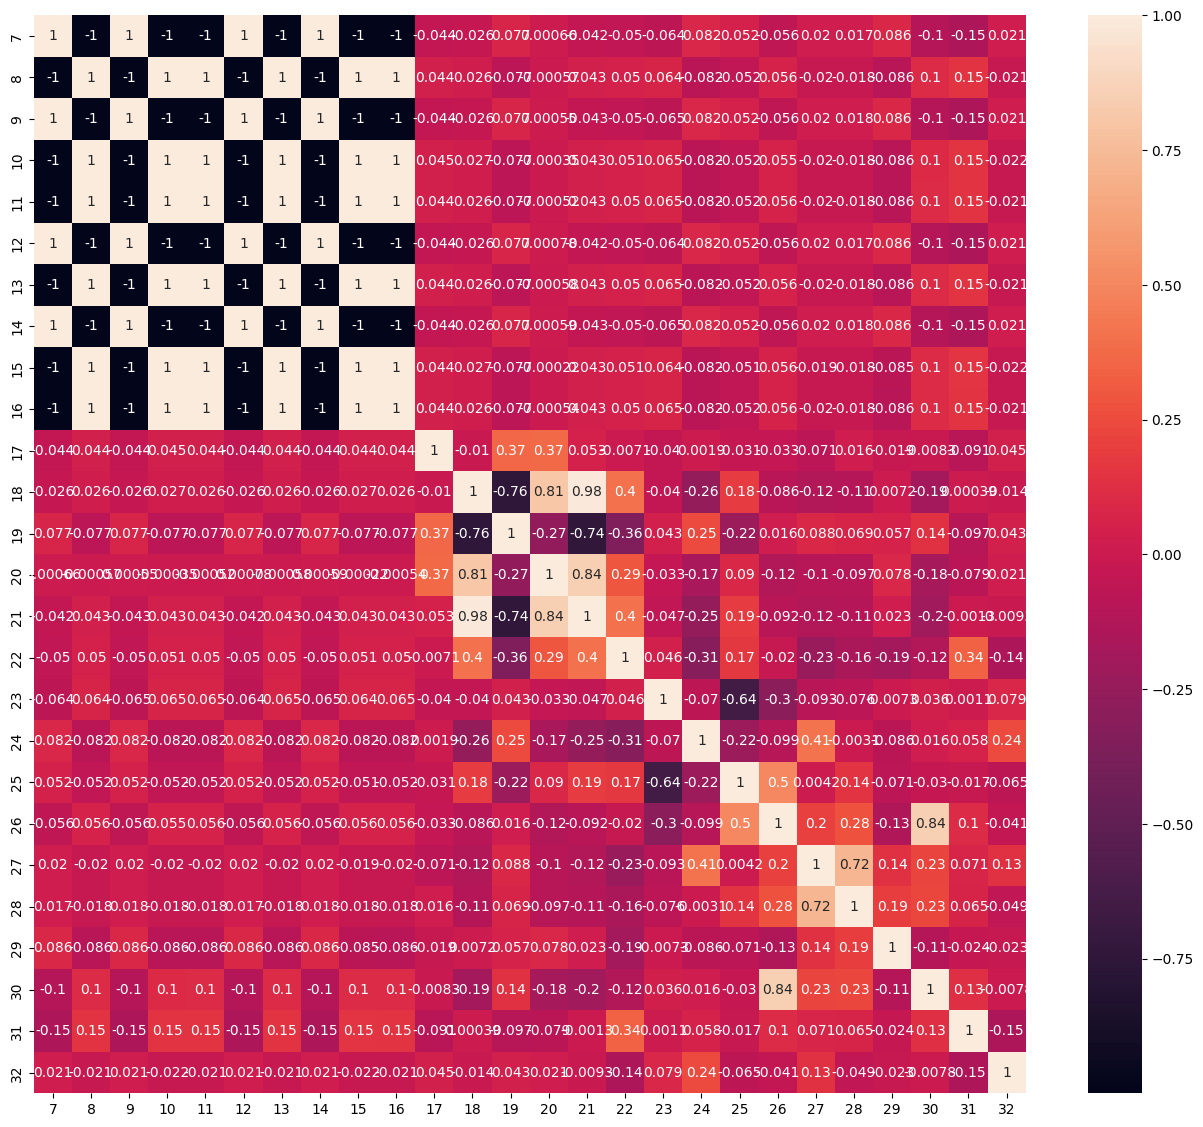

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 14
plt.rcParams["figure.figsize"] = fig_size
sns.heatmap(conf_num.corr(),annot=True)

In [ ]:
df.head()

,mean_segment1,std_dev_segment1,min_segment1,max_segment1,range_segment1,mean_segment2,std_dev_segment2,min_segment2,max_segment2,range_segment2,...,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,BMI,Hypertension,Diabetes,cerebral infarction,cerebrovascular disease
0,9485.403875,59830.644220,-56862.998890,249752.946200,306615.945100,-6198.949210,61384.237320,-102828.694500,292507.165200,395335.85970,...,152,63,161,89,97,27.27,Stage 2 hypertension,0.0,0,NaN
1,-1061.086816,3806.224675,-14369.621750,2407.896262,16777.518010,795.811176,2441.890040,-8250.101800,5737.767204,13987.86900,...,157,50,160,93,76,20.28,Stage 2 hypertension,0.0,0,NaN
2,-297.045623,931.764930,-2213.324923,3231.658501,5444.983424,-3870.598013,29386.165410,-136997.853400,26718.173240,163716.02660,...,150,47,101,71,79,20.89,Normal,0.0,0,NaN
3,-480.953082,978.021375,-2736.596369,449.539475,3186.135845,-1161.442310,10504.289360,-18964.933090,41770.684700,60735.61779,...,172,65,136,93,87,21.97,Prehypertension,0.0,0,NaN
4,-699.162080,13255.910340,-57313.694410,15812.229080,73125.923480,-477.973301,2345.917488,-4635.316139,8616.540608,13251.85675,...,155,65,123,73,73,27.06,Prehypertension,0.0,0,NaN


In [1]:
#y for Systolic BP    z for Diastolic BP

In [ ]:
y=df['Systolic Blood Pressure']
z=df['Diastolic Blood Pressure']
X=df.drop(columns=['Systolic Blood Pressure','Diastolic Blood Pressure'],axis=1)
X=ct.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_z, X_test_z, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=2)

In [ ]:
def evaluate_regression_models(X_train, X_test, y_train, y_test):
    # List of regression models
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "Support Vector Regression (SVR)": SVR()
    }

    # Dictionary to store results
    results = []

    # Iterate over each model
    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Predict on test data

        # Calculate R² score and Mean Absolute Error
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)

        # Append results
        results.append({"Model": model_name, "R2 Score": r2, "MAE": mae, "RMSE": rmse})

    # Convert results to DataFrame for better readability
    results_df = pd.DataFrame(results)

    return results_df


In [2]:
#Results for Systolic Blood Pressure

In [ ]:
results = evaluate_regression_models(X_train, X_test, y_train, y_test)
print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.462e+04, tolerance: 7.527e+00
  model = cd_fast.enet_coordinate_descent(


                             Model  R2 Score        MAE       RMSE
0                Linear Regression  0.818497   6.237702   7.913854
1                 Ridge Regression  0.856493   5.501688   7.036917
2                 Lasso Regression  0.767932   7.224902   8.948570
3                    Decision Tree  0.743192   7.159091   9.413482
4                    Random Forest  0.870975   5.539318   6.672404
5                Gradient Boosting  0.861049   5.836063   6.924304
6  Support Vector Regression (SVR) -0.000230  14.386361  18.577866


In [3]:
#Results for Diastolic Blood Pressure

In [ ]:
results = evaluate_regression_models(X_train_z, X_test_z, z_train, z_test)
print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.675e+03, tolerance: 2.054e+00
  model = cd_fast.enet_coordinate_descent(


                             Model  R2 Score       MAE       RMSE
0                Linear Regression  0.536347  6.439651   8.152736
1                 Ridge Regression  0.527035  6.580654   8.234202
2                 Lasso Regression  0.309116  7.564310   9.951979
3                    Decision Tree  0.320189  7.409091   9.871907
4                    Random Forest  0.537147  6.665000   8.145704
5                Gradient Boosting  0.482582  7.248399   8.612468
6  Support Vector Regression (SVR) -0.055045  9.309080  12.298225


In [ ]:
#Optimizing the models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

def optimized(X_train, X_test, y_train, y_test):
    # Scale data for Ridge, Lasso, and SVR
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_train_scaled[ : , 7: ] = scaler.fit_transform(X_train[ : , 7: ])
    X_test_scaled = X_test.copy()
    X_test_scaled[ : , 7: ] = scaler.transform(X_test[ : , 7: ])

    # Models and their hyperparameter grids
    models_with_params = {
        "Linear Regression": {
            "model": LinearRegression(),
            "params": {}  # No hyperparameters to tune
        },
        "Ridge Regression": {
            "model": Ridge(),
            "params": {"alpha": [0.1, 1, 10]}  # Small grid for regularization
        },
        "Lasso Regression": {
            "model": Lasso(),
            "params": {"alpha": [0.01, 0.1, 1]}  # Narrow range for L1 regularization
        },
        "Decision Tree": {
            "model": DecisionTreeRegressor(),
            "params": {
                "max_depth": [3, 5, 10, 50],
                "min_samples_split": [2, 5],
                "min_samples_leaf": [1, 2]
            }
        },
        "Random Forest": {
            "model": RandomForestRegressor(),
            "params": {
                "n_estimators": [50, 100, 300],
                "max_depth": [5, 10, None]
            }
        },
        "Gradient Boosting": {
            "model": GradientBoostingRegressor(),
            "params": {
                "n_estimators": [100, 500],
                "learning_rate": [0.1, 0.2],
                "max_depth": [3, 5]
            }
        },
        "Support Vector Regression (SVR)": {
            "model": SVR(),
            "params": {
                "C": [1, 10, 100],
                "epsilon": [0.1, 0.2]
            }
        }
    }

    # Results container
    results = []

    # Iterate through models
    for model_name, model_details in models_with_params.items():
        model = model_details["model"]
        params = model_details["params"]

        # Scale only for Ridge, Lasso, and SVR
        X_train_data = X_train_scaled if model_name in ["Ridge Regression", "Lasso Regression", "Support Vector Regression (SVR)"] else X_train
        X_test_data = X_test_scaled if model_name in ["Ridge Regression", "Lasso Regression", "Support Vector Regression (SVR)"] else X_test

        # Perform GridSearchCV for optimization
        grid_search = GridSearchCV(model, params, cv=3, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train_data, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Predict and evaluate
        y_pred = best_model.predict(X_test_data)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)

        # Append results
        results.append({
            "Model": model_name,
            "Best Params": grid_search.best_params_,
            "R2 Score": r2,
            "MAE": mae,
            "RMSE": rmse
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    return results_df


In [4]:
#Optimized Results for Systolic Blood Pressure

In [ ]:
results = optimized(X_train, X_test, y_train, y_test)
print(results)

                             Model  \
0                Linear Regression   
1                 Ridge Regression   
2                 Lasso Regression   
3                    Decision Tree   
4                    Random Forest   
5                Gradient Boosting   
6  Support Vector Regression (SVR)   

                                         Best Params  R2 Score       MAE  \
0                                                 {}  0.818497  6.237702   
1                                       {'alpha': 1}  0.872125  5.444213   
2                                     {'alpha': 0.1}  0.876804  5.485996   
3  {'max_depth': 3, 'min_samples_leaf': 2, 'min_s...  0.862577  5.327022   
4              {'max_depth': 10, 'n_estimators': 50}  0.876456  5.467273   
5  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...  0.838347  6.471356   
6                          {'C': 10, 'epsilon': 0.2}  0.539996  8.548592   

        RMSE  
0   7.913854  
1   6.642618  
2   6.519962  
3   6.886142  
4   6.52914

In [ ]:
#Optimized Results for Diastolic Blood Pressure

In [ ]:
results = optimized(X_train_z, X_test_z, z_train, z_test)
print(results)

                             Model  \
0                Linear Regression   
1                 Ridge Regression   
2                 Lasso Regression   
3                    Decision Tree   
4                    Random Forest   
5                Gradient Boosting   
6  Support Vector Regression (SVR)   

                                         Best Params  R2 Score       MAE  \
0                                                 {}  0.536347  6.439651   
1                                       {'alpha': 1}  0.552237  6.374733   
2                                     {'alpha': 0.1}  0.546962  6.433376   
3  {'max_depth': 3, 'min_samples_leaf': 1, 'min_s...  0.598472  6.216535   
4              {'max_depth': 10, 'n_estimators': 50}  0.548553  6.434375   
5  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  0.472453  7.334391   
6                          {'C': 10, 'epsilon': 0.2}  0.392507  6.538316   

       RMSE  
0  8.152736  
1  8.011822  
2  8.058872  
3  7.586908  
4  8.044708  
5 

In [ ]:
results2 = optimized(X_train_z, X_test_z, z_train, z_test)
print(results2)

                             Model  \
0                Linear Regression   
1                 Ridge Regression   
2                 Lasso Regression   
3                    Decision Tree   
4                    Random Forest   
5                Gradient Boosting   
6  Support Vector Regression (SVR)   

                                         Best Params  R2 Score       MAE  \
0                                                 {}  0.536347  6.439651   
1                                       {'alpha': 1}  0.552237  6.374733   
2                                     {'alpha': 0.1}  0.546962  6.433376   
3  {'max_depth': 3, 'min_samples_leaf': 1, 'min_s...  0.598472  6.216535   
4              {'max_depth': 5, 'n_estimators': 100}  0.564204  6.435489   
5  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  0.473938  7.342799   
6                          {'C': 10, 'epsilon': 0.2}  0.392507  6.538316   

       RMSE  
0  8.152736  
1  8.011822  
2  8.058872  
3  7.586908  
4  7.904032  
5 

In [5]:
#Performing Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

def select_features(df, target_feature, num_features_to_select=10):

    if target_feature not in df.columns:
        print(f"Error: Target feature '{target_feature}' not found in DataFrame.")
        return None

    # Separate features (X) and target (y)
    X = df.drop(columns=[target_feature])
    y = df[target_feature]

    # Handle non-numeric features
    for col in X.columns:
        if not pd.api.types.is_numeric_dtype(X[col]):
          try:
            X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert to numeric, handle errors
          except:
            X = X.drop(columns=[col])
    X = X.dropna()
    y = y[X.index]

    # Use SelectKBest to select the top k features based on ANOVA F-value
    selector = SelectKBest(score_func=f_regression, k=min(num_features_to_select, X.shape[1]))
    X_new = selector.fit_transform(X, y)

    # Get selected feature names
    selected_feature_indices = selector.get_support(indices=True)
    selected_feature_names = X.columns[selected_feature_indices].tolist()

    # Create new DataFrame with selected features and target
    new_df = pd.DataFrame(X_new, columns=selected_feature_names)
    new_df[target_feature] = y

    return new_df

In [ ]:
selected_df = select_features(conf1, 28 , num_features_to_select=10)
print(selected_df)

      0    2    3    5      22     25    26     27    29     30    28
0    0.0  0.0  1.0  0.0    2.0  152.0  63.0  161.0  97.0  27.27  89.0
1    0.0  0.0  1.0  0.0    3.0  157.0  50.0  160.0  76.0  20.28  93.0
2    1.0  0.0  0.0  0.0    6.0  150.0  47.0  101.0  79.0  20.89  71.0
3    0.0  0.0  0.0  0.0    8.0  172.0  65.0  136.0  87.0  21.97  93.0
4    0.0  0.0  0.0  0.0    9.0  155.0  65.0  123.0  73.0  27.06  73.0
..   ...  ...  ...  ...    ...    ...   ...    ...   ...    ...   ...
214  1.0  0.0  0.0  0.0  415.0  180.0  70.0  111.0  77.0  21.60  70.0
215  1.0  0.0  0.0  0.0  416.0  156.0  47.0   93.0  79.0  19.31  57.0
216  0.0  0.0  0.0  0.0  417.0  176.0  55.0  120.0  72.0  17.76  69.0
217  1.0  0.0  0.0  0.0  418.0  173.0  63.0  106.0  67.0  21.05  69.0
218  1.0  0.0  0.0  0.0  419.0  175.0  58.0  108.0  65.0  18.94  68.0

[219 rows x 11 columns]


In [ ]:
from sklearn.model_selection import train_test_split

A = selected_df.drop(columns=[27,28],axis=1)
b = selected_df[28]
A_train_fs, A_test_fs, b_train_fs, b_test_fs = train_test_split(A, b, test_size=0.2, random_state=42)

In [ ]:
results = evaluate_regression_models(A_train_fs, A_test_fs, b_train_fs, b_test_fs)
print(results)
#For Diastolic BP

                             Model  R2 Score        MAE       RMSE
0                Linear Regression  0.360784   6.001684   7.589408
1                 Ridge Regression  0.363897   5.945580   7.570907
2                 Lasso Regression  0.251798   6.469082   8.210953
3                    Decision Tree -0.905521  10.659091  13.103608
4                    Random Forest  0.194650   6.906136   8.518759
5                Gradient Boosting  0.348243   6.030319   7.663498
6  Support Vector Regression (SVR) -0.002951   7.525607   9.506569
